In [1]:
from lxml import objectify, etree, html
import urllib
from urllib import request
from urllib.request import urlopen
import pandas as pd
from pymystem3 import Mystem
import re
import numpy as np

In [2]:
topics = ['religion', 'economy', 'politics', 'science']

In [3]:
read_dictionary = np.load('allTexts.npy').item()

In [4]:
allTextList = list()
for category in topics:
    for topic in range(0,len(read_dictionary[category])):
        #for i in range(0,2):
        text = read_dictionary[category][topic][1]
        text = re.sub("xa0",' ', text)
        text = re.sub(r"\\",'', text)
        text = re.sub('n  ','', text)
        text = re.sub('n ','', text)
        text = re.sub(r'[$«»–()\.,%/—\-\"\'’…:;#№!?\r\n]', " ", text)
        text = re.sub('    ',' ', text)
        text = re.sub('   ',' ', text)
        text = re.sub('  ',' ', text)
        allTextList.append(text.replace(u'\xa0', ' '))

In [5]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

v = CountVectorizer() 
tf = TfidfTransformer() 

vect = v.fit_transform(allTextList) 
tfidf=tf.fit_transform(vect)

In [6]:
tfidfMatrix = tfidf.toarray()

In [7]:
df = pd.DataFrame(tfidfMatrix)

In [8]:
import copy

X = copy.copy(df)

In [9]:
j = 1
df['label'] = 100
for topic in topics:
    for i in range(0,200):
        df['label'][i + (j-1)*200] = j
    j = j + 1

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
Y = df['label']

In [11]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 14)

In [13]:
x_test

0      1      2      3      4      5         6      7      8      \
378  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
532  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
599  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
778  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
382  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
371  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
449  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
748  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
106  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
134  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
354  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
137  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
417  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
448  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
434  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
445  0.083961    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
55   0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
651  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
496  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
385  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
108  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
447  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
116  0.090902    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
282  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
160  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
180  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
300  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
243  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
594  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
533  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
..        ...    ...    ...    ...    ...    ...       ...    ...    ...   
412  0.000000    0.0    0.0    0.0    0.0    0.0  0.059211    0.0    0.0   
431  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
188  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
509  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
682  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
311  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
146  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
20   0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
189  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
5    0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
270  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
13   0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
220  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
47   0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
558  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
550  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
582  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
52   0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
362  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
554  0.000000    0.0    0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
107  0.000000    0.0    0.0    0.0    0.0    0.0  0.0000

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
import itertools
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

%matplotlib inline

In [27]:
print(X_train.shape, x_test.shape)
print(Y_train.shape, y_test.shape)

(560, 33823) (240, 33823)
(560,) (240,)


#### Define classifiers:

In [17]:
predictor_lr = LogisticRegression().fit(X_train, Y_train)
predictor_svm = LinearSVC().fit(X_train, Y_train)
predictor_rf = RandomForestClassifier(n_estimators=1000).fit(X_train, Y_train)
predictor_gbt = GradientBoostingClassifier(n_estimators=100).fit(X_train, Y_train)

#### Evaluate Classifiers:

In [21]:
y_pred_lr = predictor_lr.predict(x_test)
print('LR accuracy: {}%'.format(round(np.mean(y_test == y_pred_lr), 2)))
y_pred_svm = predictor_svm.predict(x_test)
print('SVM accuracy: {}%'.format(round(np.mean(y_test == y_pred_svm), 2)))
y_pred_rf = predictor_rf.predict(x_test)
print('RF accuracy: {}%'.format(round(np.mean(y_test == y_pred_rf), 2)))
y_pred_gbt = predictor_gbt.predict(x_test)
print('GBT accuracy: {}%'.format(round(np.mean(y_test == y_pred_gbt), 2)))

LR accuracy: 0.91%
SVM accuracy: 0.95%
RF accuracy: 0.9%
GBT accuracy: 0.83%


#### Confusion Matrices:

In [28]:
def plot_confusion_matrix(cm, title='Confusion matrix'):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[0])
    classes = ['1','2','3','4']
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)

Confusion Matrices для лучшей модели:

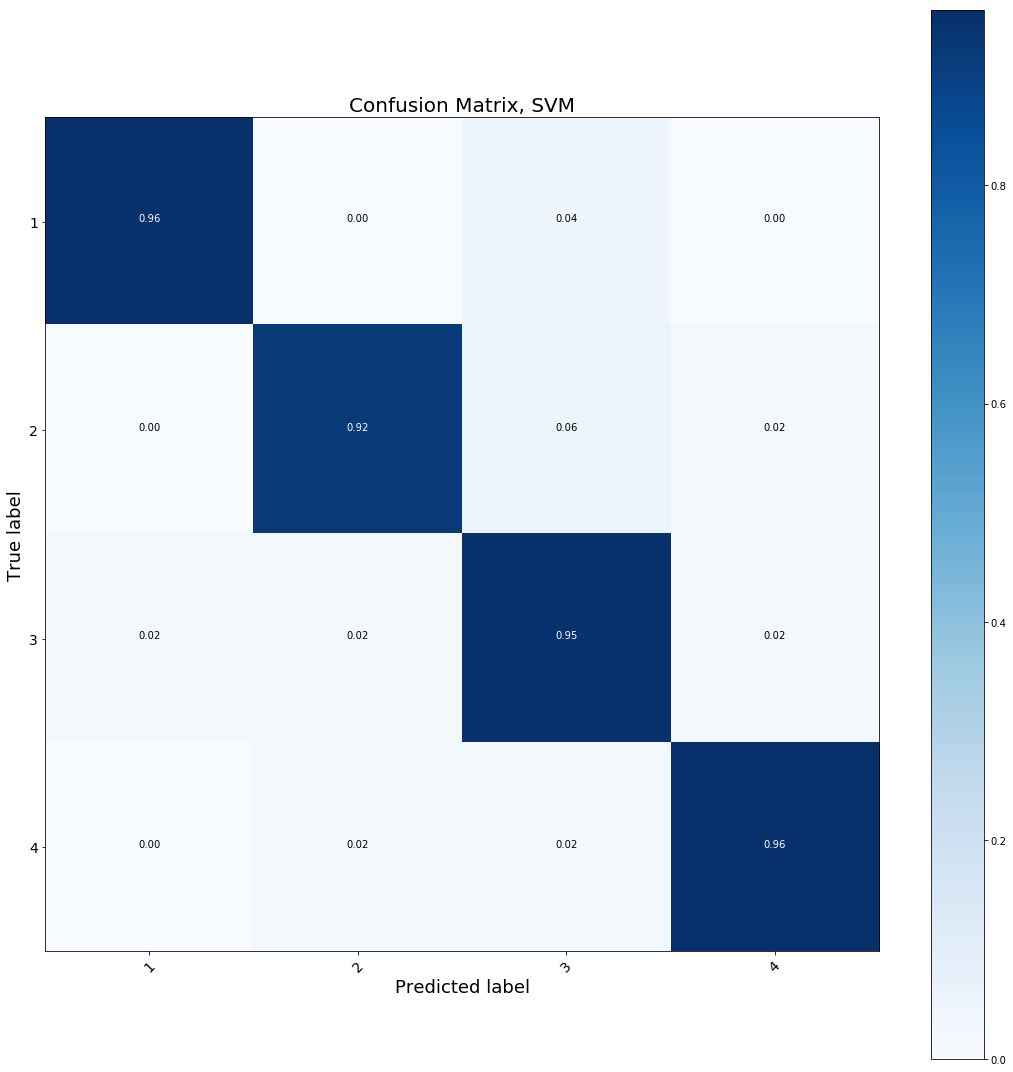

In [29]:
cmt_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cmt_svm, title='Confusion Matrix, SVM')

#### Feature Importances:

(-1e-05, 0.00019)

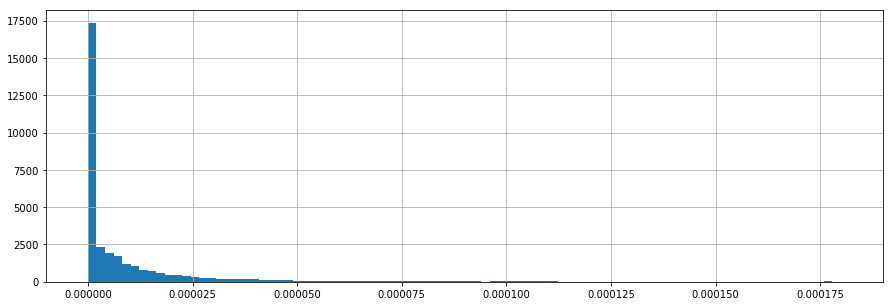

In [48]:
plt.figure(figsize=(15, 5))
plt.hist(predictor_rf.feature_importances_, bins=5000)
plt.grid(True)
plt.xlim(-0.00001, 0.00019)

#### Create feature selector:

In [50]:
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=10)).fit(X_train, Y_train)
X_train_transformed = feature_selector.transform(X_train)
X_test_transformed = feature_selector.transform(x_test)

print(X_train_transformed.shape, X_test_transformed.shape)

(560, 1137) (240, 1137)


Train and evaluate the new classifier:

In [52]:
predictor_lr_ = LogisticRegression().fit(X_train_transformed, Y_train)

In [54]:
y_pred_lr_ = predictor_lr_.predict(X_test_transformed)
print('LR (with feature selection) accuracy: {}%'.format(round(np.mean(y_test == y_pred_lr_), 2)))

LR (with feature selection) accuracy: 0.81%


#### Binary Classification

In [56]:
predictor_oneVSall = OneVsRestClassifier(LinearSVC(), n_jobs=8).fit(X_train, Y_train)

In [58]:
y_pred_onevsall = predictor_oneVSall.predict(x_test)
print('One-VS-all accuracy: {}%'.format(round(np.mean(y_test == y_pred_onevsall), 2)))

One-VS-all accuracy: 0.95%


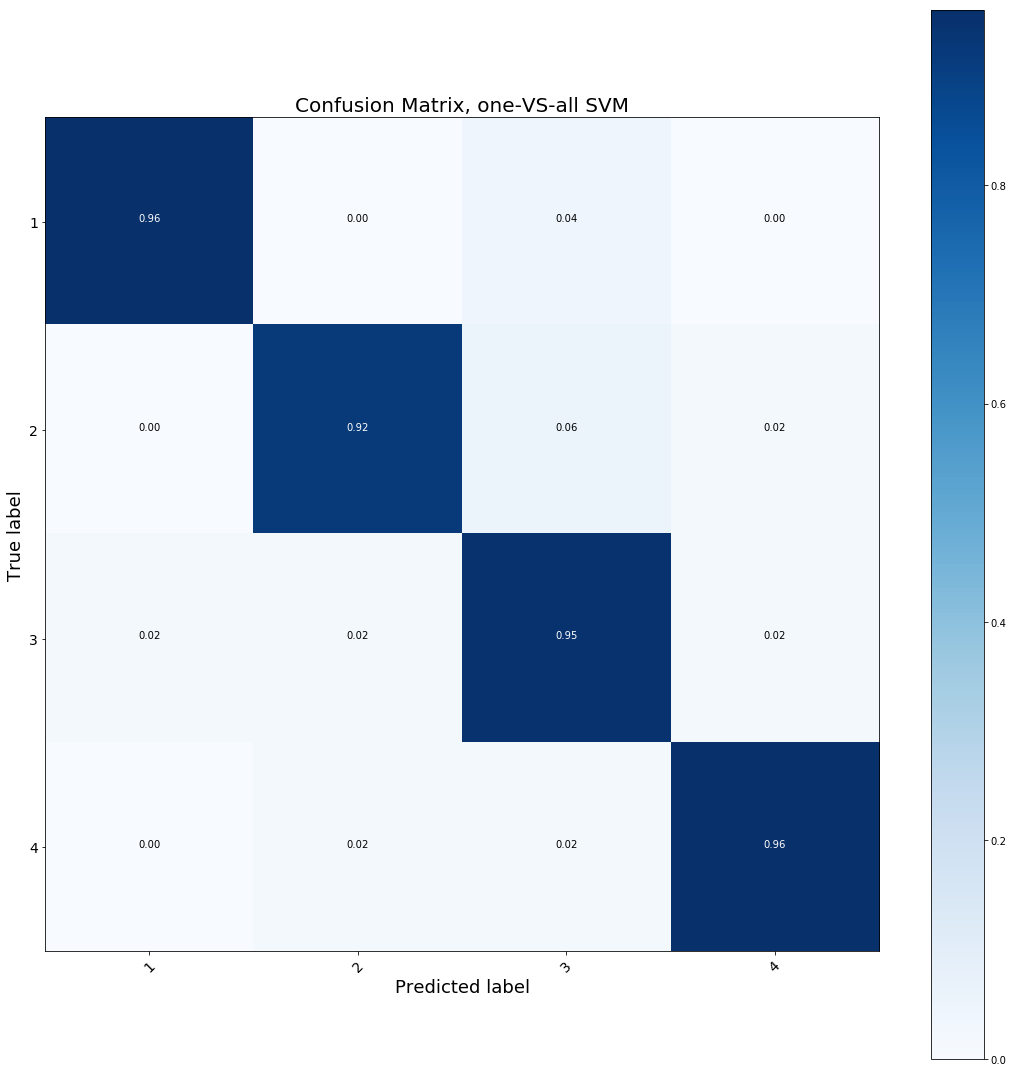

In [59]:
cmt_svm_onevsall = confusion_matrix(y_test, y_pred_onevsall)
plot_confusion_matrix(cmt_svm_onevsall, title='Confusion Matrix, one-VS-all SVM')

In [60]:
predictor_oneVSone = OneVsOneClassifier(LinearSVC(), n_jobs=8).fit(X_train, Y_train)

In [61]:
y_pred_onevsone = predictor_oneVSone.predict(x_test)
print('One-VS-one accuracy: {}%'.format(round(np.mean(y_test == y_pred_onevsone), 2)))

One-VS-one accuracy: 0.95%


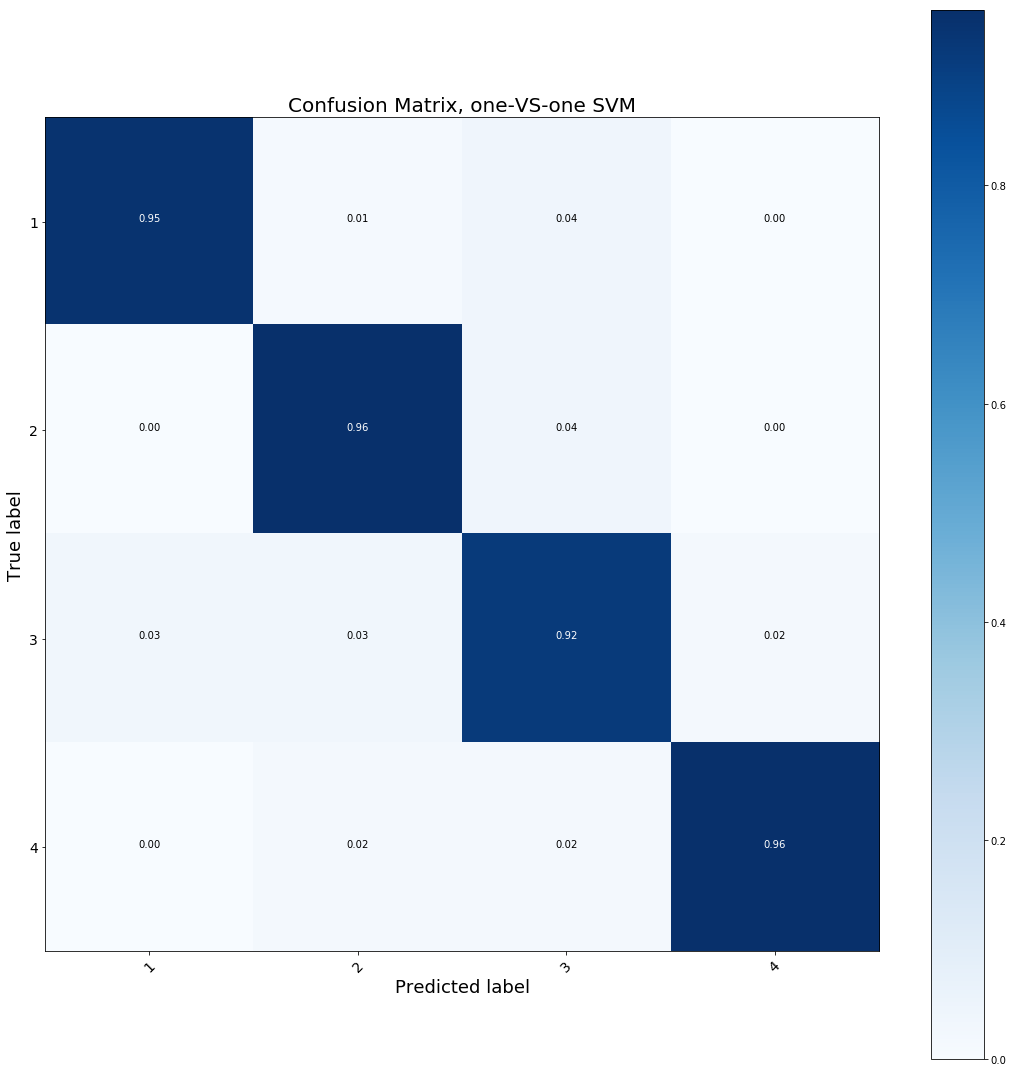

In [62]:
cmt_svm_onevsone = confusion_matrix(y_test, y_pred_onevsone)
plot_confusion_matrix(cmt_svm_onevsone, title='Confusion Matrix, one-VS-one SVM')

In [64]:
for c in np.unique(Y_train):
    print('Class \'{}\' samples N: {}'.format(c, Y_train[Y_train == c].shape[0]))

Class '1' samples N: 124
Class '2' samples N: 149
Class '3' samples N: 137
Class '4' samples N: 150


In [65]:
import seaborn as sns

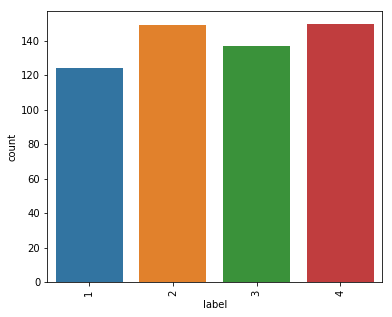

In [75]:
plt.figure(figsize=(6, 5))
plot_DeviceType = sns.countplot(Y_train)
plot_DeviceType.set_xticklabels(plot_DeviceType.get_xticklabels(),rotation=90);

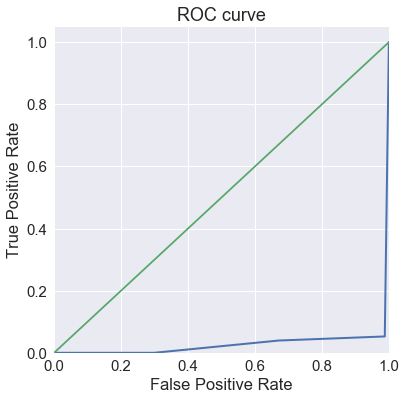

In [78]:
from sklearn.metrics import roc_curve

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(6,6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_onevsone, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

### Ensembling:

In [81]:
print(np.mean(RandomForestClassifier(n_estimators=10).fit(X_train, Y_train).predict(x_test) == y_test))
print(np.mean(RandomForestClassifier(n_estimators=100, criterion='entropy').fit(X_train, Y_train).predict(x_test) == y_test))
print(np.mean(GradientBoostingClassifier(n_estimators=10).fit(X_train, Y_train).predict(x_test) == y_test))

0.75
0.866666666667
0.754166666667


In [90]:
ensemble_soft = VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='soft', n_jobs=3)

ensemble_hard = VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='hard', n_jobs=3)

In [91]:
ensemble_soft.fit(X_train, Y_train)
ensemble_hard.fit(X_train, Y_train)

VotingClassifier(estimators=[('rf_gini_10', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
      ...s=10, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))],
         n_jobs=3, voting='hard', weights=None)

In [92]:
y_pred_hard = ensemble_hard.predict(x_test)
y_pred_soft = ensemble_soft.predict(x_test)

In [93]:
print('Hard voting accuracy: {}%'.format(round(np.mean(y_test == y_pred_hard), 2)))
print('Soft voting accuracy: {}%'.format(round(np.mean(y_test == y_pred_soft), 2)))

Hard voting accuracy: 0.86%
Soft voting accuracy: 0.82%
